# Fluctuations

## Preamble

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../')
import fluctuations
import twenty_one
import physics as phys

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d


Bad key text.latex.preview in file matplotlibrc, line 14 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import matplotlib.pylab as pylab
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Velocity Fluctuations

In [4]:
v_fluc = fluctuations.Velocity_Fluctuations()

### Velocity Correlation Functions

(1, 1000.0)

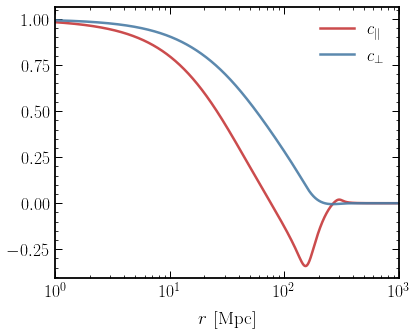

In [5]:
x_ary = np.arange(0, 1000, 0.001)

plt.figure()

plt.xscale('log')

plt.plot(x_ary, v_fluc.cparint(x_ary), label=r'$c_\parallel$')

plt.plot(x_ary, v_fluc.cperpint(x_ary), label=r'$c_\perp$')

plt.legend()

plt.xlabel('$r$ [Mpc]')

plt.xlim(1, 1e3)

### Velocity Power Spectra

In [21]:
k_ary = np.logspace(-3, 1, num=600)

_, Delta2_vrel  = v_fluc.Delta2_v(k_ary) 

_, Delta2_vrel2 = v_fluc.Delta2_v2(k_ary)

k_vrel_fft, Delta2_vrel_fft = v_fluc.Delta2_v(use_logfft=True) 

k_vrel2_fft, Delta2_vrel2_fft = v_fluc.Delta2_v2(use_logfft=True)

Text(0, 0.5, '$\\Delta_{v^2}^2$ [km$^4$ s$^{-4}$]')

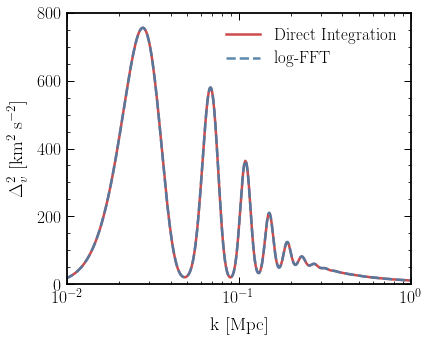

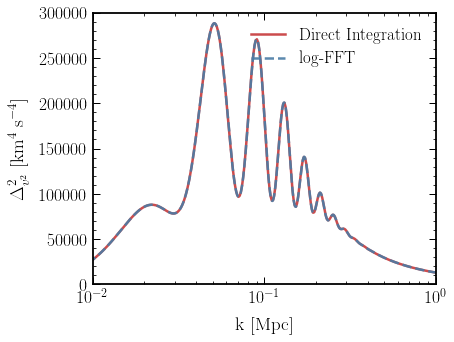

In [22]:
plt.figure()

plt.semilogx(k_ary, Delta2_vrel, label='Direct Integration')
plt.semilogx(k_vrel_fft, Delta2_vrel_fft, '--', label='log-FFT')

plt.legend()

plt.xlim(1e-2, 1)
plt.ylim(0, 800)

plt.xlabel(r'k [Mpc]')
plt.ylabel(r'$\Delta_v^2$ [km$^2$ s$^{-2}$]')

plt.figure()

plt.semilogx(k_ary, Delta2_vrel2, label='Direct Integration')
plt.semilogx(k_vrel2_fft, Delta2_vrel2_fft, '--', label='log-FFT')

plt.legend()

plt.xlim(1e-2, 1)
plt.ylim(0, 3e5)


plt.xlabel(r'k [Mpc]')
plt.ylabel(r'$\Delta_{v^2}^2$ [km$^4$ s$^{-4}$]')

In [23]:
norm_Delta2_vrel = np.trapz(Delta2_vrel / k_ary, k_ary) 
print('Delta_v^2 is normalized to sigma_3D^2: ', norm_Delta2_vrel, 29**2)

norm_Delta2_vrel2 = np.trapz(Delta2_vrel2 / k_ary, k_ary) 
print('Delta_v^2 is normalized to (2/3) * sigma_3D^4: ', norm_Delta2_vrel2, (2/3) * 29**4)

Delta_v^2 is normalized to sigma_3D^2:  840.0686943914541 841
Delta_v^2 is normalized to (2/3) * sigma_3D^4:  470293.9807906768 471520.6666666666


## Temperature Fluctuations

### Initialization - $x_\alpha$ Data ###

In [6]:
from scipy.io import loadmat
xA_param = loadmat('/users/hongwan/Dropbox (Princeton)/Fluctuations/for_Hongwan/xA_from_Anastasia/PT_LyACMB_NoRad.mat')
xA_data = loadmat('/users/hongwan/Dropbox (Princeton)/Fluctuations/for_Hongwan/xA_from_Anastasia/xA_LyACMB_NoRad.mat')

# These are the entries where X-ray heating is small. Pick any of these indices. 
print('Some indices where xA < 1e-3: ', np.argwhere(xA_param['PTout'][:,3] < 1e-3).flatten()[-7:])

ind = 3184

print('Parameters: ', xA_param['PTout'][ind, :])

xA_z_ary = np.arange(6., 51.)

xA_ary = xA_data['xAout'][ind] 

# In preparation for log-interpolation
xA_ary[xA_ary <= 0] = 1e-100

log10_xA_int = interp1d(xA_z_ary, np.log10(xA_ary))

Some indices where xA < 1e-3:  [3165 3170 3171 3175 3182 3184 3187]
Parameters:  [2.30000000e+01 5.81142300e-02 1.51778890e+01 6.38692123e-04
 1.30000000e+00 7.00000000e-01 5.98084785e+01 9.31983920e-02
 0.00000000e+00]


(0.001, 1000.0)

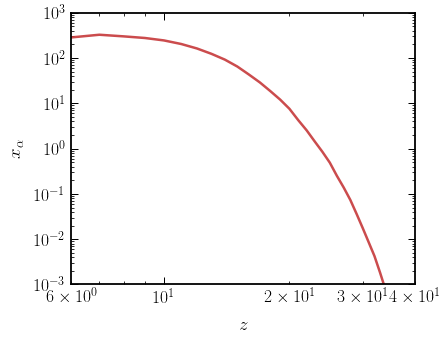

In [7]:
plt.figure()

plt.loglog()

plt.plot(xA_z_ary, xA_data['xAout'][ind,:])

plt.xlabel(r'$z$')
plt.ylabel(r'$x_\alpha$')

plt.xlim(6, 40)
plt.ylim(1e-3, 1e3)

### Initialization - Temperature Data ###

In [8]:
data_folder = '/users/hongwan/Dropbox (Princeton)/Fluctuations/Vrel_scan/extended_redshift_data_fixed_He_bug/'

mm_string = '30_MeV'

Vlis = np.loadtxt(open(data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(data_folder+'Qlis.csv'), delimiter=',')
zlis = np.loadtxt(open(data_folder+'zlis.csv'), delimiter=',')

# dimensions zlis x Qlis x Vlis
data = np.array([np.loadtxt(data_folder+'mc100MeV_mm'+mm_string+'_z_'+str(int(z))+'.csv', delimiter=',') for z in zlis])

# change to Qlis x Vlis x zlis
data = np.transpose(data, axes=(1, 2, 0)) / phys.kB 

### Converting to 21-cm Brightness Temperature

In [48]:
# dimensions Qlis x Vlis x zlis 
T21_data = twenty_one.T21(zlis, 10**log10_xA_int(zlis), data)


0.05237223688824735


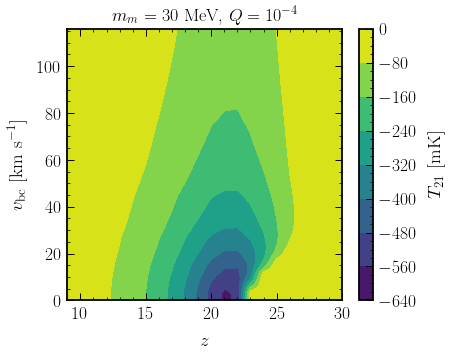

In [131]:
plt.figure()

plt.contourf(zlis, Vlis * 29, T21_data[70] * 1e3)

print(Qlis[70])

plt.title(r'$m_m = $ 30 MeV, $Q = 10^{-4}$')

plt.xlabel(r'$z$')
plt.ylabel(r'$v_\mathrm{bc}$ [km s$^{-1}$]')

plt.colorbar(label='$T_{21}$ [mK]')

In [139]:
# Play with reduced dataset first. Change to Vlis x zlis x Qlis
T21_data_reduced = np.transpose(T21_data[50:60, :, :], axes=(1, 2, 0))

print(T21_data_reduced.shape)

(161, 22, 10)


In [140]:
%autoreload 

T21_fluc = fluctuations.Fluctuations(Vlis*29., T21_data_reduced)

In [90]:
# x_ary = np.linspace(1e-6, 1e3, num=100000)
x_ary = np.logspace(-5, 3, num=1000000)

xi_f_ary = T21_fluc.xi_f(x_ary, fine_mesh=True)

In [85]:
xi_f_ary.shape

(1000000, 3, 10)

Text(0, 0.5, '$\\langle T_{21} \\rangle^2 \\xi_{T_{21}}$ [mK$^{2}$]')

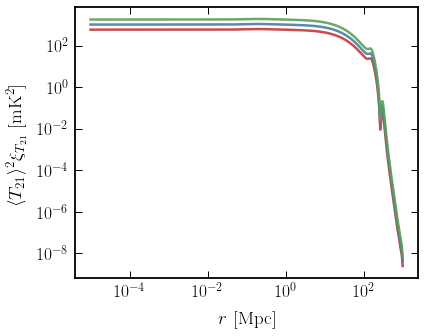

In [91]:
plt.figure()

plt.loglog()

# x_ary x zlis x Qlis

for i,_ in enumerate(xi_f_ary[0,:,0]):
    plt.plot(x_ary, 1e6*xi_f_ary[:,i,-1])

plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$\langle T_{21} \rangle^2 \xi_{T_{21}}$ [mK$^{2}$]')

# plt.xlim(9e-4, 2e-3)
# plt.xlim(1e2, 4e2)
# plt.ylim(1e-4, 1e-2)

In [24]:
# %autoreload 

# T21_fluc = fluctuations.Fluctuations(Vlis*29., T21_data_reduced)

print(T21_fluc.var)
# print(T21_fluc.var + T21_fluc.mean**2)
# print(T21_fluc.mean**2)

print(T21_fluc.xi_f_numerical([1e-3]))
# print(T21_fluc.xi_f_short_dist([.00001]))

print(T21_fluc.var / T21_fluc.xi_f_numerical([1e-3]))

[1.25139247e-05 2.20544067e-05 3.84217273e-05 6.65591111e-05
 1.15102897e-04 1.99581916e-04 3.47343401e-04 6.06423479e-04
 1.06513253e-03 1.86235790e-03 3.22745946e-03 5.30923277e-03
 7.14708776e-03 7.17396533e-03 3.38409175e-03 4.43722396e-03
 3.33217642e-03 1.28783492e-03 3.98250566e-04 7.57633933e-05
 1.99886720e-05 5.65632791e-05]
[[1.25925809e-05 2.21928189e-05 3.86620905e-05 6.69745350e-05
  1.15819183e-04 2.00822375e-04 3.49505791e-04 6.10208298e-04
  1.07178613e-03 1.87399583e-03 3.24761228e-03 5.34235084e-03
  7.19143560e-03 7.21824114e-03 3.40306430e-03 4.47025156e-03
  3.35760572e-03 1.29398811e-03 4.00606262e-04 7.63682158e-05
  2.00822626e-05 5.68836881e-05]]
[[0.99375376 0.9937632  0.99378297 0.99379729 0.99381548 0.9938231
  0.99381301 0.9937975  0.99379204 0.99378978 0.99379457 0.99380084
  0.99383324 0.99386612 0.99442486 0.99261169 0.99242636 0.99524479
  0.99411967 0.99208018 0.99533964 0.9943673 ]]


In [68]:
# import pyfftlog

# logrmin = -4
# logrmax = 4
# n_pts = 128
# q = 0

# def f(ar_ary): 

#     return np.einsum('i,j,k->ijk', ar_ary, ar_ary, ar_ary)

# # Sensible approximate choice of k_c r_c
# kr = 1

# # Tell fhti to change kr to low-ringing value
# # WARNING: kropt = 3 will fail, as interaction is not supported
# kropt = 1

# # Forward transform (changed from dir to tdir, as dir is a python fct)
# tdir = 1

# # Central point log10(r_c) of periodic interval
# logrc = (logrmin + logrmax)/2

# # Central index (1/2 integral if n is even)
# nc = (n_pts + 1)/2.0

# # Log-spacing of points
# dlogr = (logrmax - logrmin)/n_pts
# dlnr = dlogr*np.log(10.0)


# # Initialization. kr = k_c r_c, where c is the central point. 
# kr, xsave = pyfftlog.fhti(n_pts, 0.5, dlnr, q, kr, kropt)
# logkc = np.log10(kr) - logrc


# # Actual r-binning
# r_ary = 10**(logrc + (np.arange(1, n_pts+1) - nc)*dlogr)
# # Actual k-binning
# k_ary = 10**(logkc + (np.arange(1, n_pts+1) - nc)*dlogr)

# # function to log-Fourier transform. 
# # In general f returns something multidimensional. 
# # ar_ary has dimensions ... x r_ary. 
# ar_ary = np.moveaxis(f(r_ary), 0, -1) * (r_ary)**(1.5 - q)

# ak_ary = np.zeros(ar_ary.shape) 

# indices_ary = np.moveaxis(np.indices(ak_ary[...,0].shape), 0, -1)

# for ind in indices_ary.reshape(-1, indices_ary.shape[-1]): 

#     if ind.shape == ():

#         ak_ary[ind] = (2*np.pi)**1.5 * k_ary**(-1.5-q) * pyfftlog.fht(ar_ary[ind].copy(), xsave, tdir)

#     else:

#         ak_ary[tuple(ind)] = (2*np.pi)**1.5 * k_ary**(-1.5-q) * pyfftlog.fht(ar_ary[tuple(ind)].copy(), xsave, tdir)


[[[  0   0]
  [  0   1]
  [  0   2]
  ...
  [  0 125]
  [  0 126]
  [  0 127]]

 [[  1   0]
  [  1   1]
  [  1   2]
  ...
  [  1 125]
  [  1 126]
  [  1 127]]

 [[  2   0]
  [  2   1]
  [  2   2]
  ...
  [  2 125]
  [  2 126]
  [  2 127]]

 ...

 [[125   0]
  [125   1]
  [125   2]
  ...
  [125 125]
  [125 126]
  [125 127]]

 [[126   0]
  [126   1]
  [126   2]
  ...
  [126 125]
  [126 126]
  [126 127]]

 [[127   0]
  [127   1]
  [127   2]
  ...
  [127 125]
  [127 126]
  [127 127]]]
[0 0]
[0 1]
[0 2]
[0 3]
[0 4]
[0 5]
[0 6]
[0 7]
[0 8]
[0 9]
[ 0 10]
[ 0 11]
[ 0 12]
[ 0 13]
[ 0 14]
[ 0 15]
[ 0 16]
[ 0 17]
[ 0 18]
[ 0 19]
[ 0 20]
[ 0 21]
[ 0 22]
[ 0 23]
[ 0 24]
[ 0 25]
[ 0 26]
[ 0 27]
[ 0 28]
[ 0 29]
[ 0 30]
[ 0 31]
[ 0 32]
[ 0 33]
[ 0 34]
[ 0 35]
[ 0 36]
[ 0 37]
[ 0 38]
[ 0 39]
[ 0 40]
[ 0 41]
[ 0 42]
[ 0 43]
[ 0 44]
[ 0 45]
[ 0 46]
[ 0 47]
[ 0 48]
[ 0 49]
[ 0 50]
[ 0 51]
[ 0 52]
[ 0 53]
[ 0 54]
[ 0 55]
[ 0 56]
[ 0 57]
[ 0 58]
[ 0 59]
[ 0 60]
[ 0 61]
[ 0 62]
[ 0 63]
[ 0 64]
[ 0 65]
[ 0 66

In [141]:
%autoreload 

T21_fluc = fluctuations.Fluctuations(Vlis*29., T21_data_reduced)

k_test, xi_fft_test = T21_fluc.Delta2_f()

[ 9. 10. 11. 12. 13. 14.]


(0.01, 10000.0)

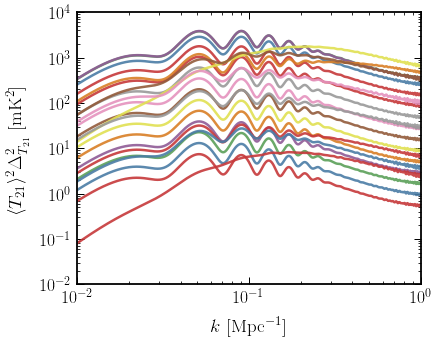

In [135]:
plt.figure()

plt.loglog()


# plt.plot(k_test, xi_fft_test[0,0])
print(zlis[:6])
for fft_ary in xi_fft_test[:,0]: 

        plt.plot(k_test, fft_ary*1e6)

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\langle T_{21} \rangle^2 \Delta_{T_{21}}^2$ [mK$^{2}$]')

plt.xlim(1e-2, 1)
plt.ylim(1e-2, 1e4)


[0.00234848 0.00274285 0.00320345 0.0037414  0.00436968 0.00510347
 0.00596048 0.0069614  0.00813041 0.00949572]
[ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26.
 27. 28. 29. 30.]
(22, 10, 4096)


(0.01, 10000.0)

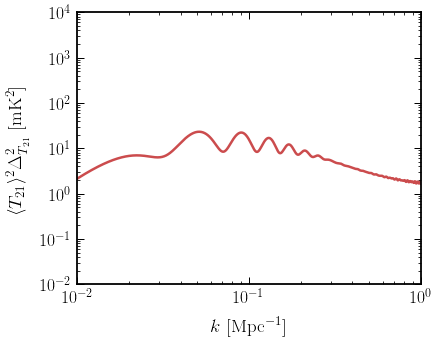

In [144]:
plt.figure()

plt.loglog()


# plt.plot(k_test, xi_fft_test[0,0])

print(Qlis[50:60])
print(zlis)
print(xi_fft_test.shape)

plt.plot(k_test, xi_fft_test[2,0]*1e6)

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\langle T_{21} \rangle^2 \Delta_{T_{21}}^2$ [mK$^{2}$]')

plt.xlim(1e-2, 1)
plt.ylim(1e-2, 1e4)

In [310]:
# x_ary = np.array([1]) 
# y_ary = np.array([1])
# u1 = np.array([0, 5])
# u2 = np.array([0, 5])


# # y = cos theta
# term_1 = T21_fluc.v_fluc.cperpint(x_ary)**2 
# term_2 = y_ary[:,None]**2 * (
#     T21_fluc.v_fluc.cparint(x_ary)**2 - T21_fluc.v_fluc.cperpint(x_ary)**2
# )

# test_R = np.sqrt(term_1 + term_2) 


# one_minus_R_sq = 1. - test_R**2 
# u1_sq_plus_u2_sq = u1[:,None]**2 + u2[None,:]**2 

# print(u1_sq_plus_u2_sq)

# term_1 = np.einsum(
#     'ij,k,l->ijkl', 1./(test_R*np.sqrt(one_minus_R_sq)), u1, u2
# ) / np.pi

# term_2a_exp = np.einsum(
#     'ij,kl->ijkl', 1. / (2 * one_minus_R_sq), -u1_sq_plus_u2_sq
# )

# term_2b_exp = np.einsum(
#     'ij,k,l->ijkl', 2 * test_R / (2 * one_minus_R_sq),
#     u1, u2
# )



# term_2 = 0.5*np.exp(term_2a_exp + term_2b_exp)


# term_3 = 1. - np.exp(-2*term_2b_exp)

# print(term_1)
# print(term_2)
# print(term_2b_exp)
# print(term_3)

# dW_zero_R = np.einsum(
#     'ij,kl,k,l->ijkl',
#     np.ones_like(one_minus_R_sq),
#     np.exp(-u1_sq_plus_u2_sq/2) / np.pi, (u1)**2, (u2)**2
# )

[[ 0 25]
 [25 50]]
[[[[ 0.         0.       ]
   [ 0.        43.2786779]]]]
[[[[5.00000000e-001 5.69693046e-156]
   [5.69693046e-156 1.66681232e-006]]]]
[[[[  0.           0.        ]
   [  0.         700.92894926]]]]
[[[[0. 0.]
   [0. 1.]]]]


In [366]:
# x_ary = np.array([1]) 
# y_ary = np.array([1])
# sp_ary = np.array([0, 2.5, 5])
# sm_ary = np.array([-2.5, 0, 2.5])

# term_1 = T21_fluc.v_fluc.cperpint(x_ary)**2 
# term_2 = y_ary[:,None]**2 * (
#     T21_fluc.v_fluc.cparint(x_ary)**2 - T21_fluc.v_fluc.cperpint(x_ary)**2
# )

# test_R = np.sqrt(term_1 + term_2)

# print(test_R)


# one_minus_R_sq = 1. - test_R**2 

# sp_sq_plus_sm_sq  = sp_ary[:,None]**2 + sm_ary[None,:]**2 

# sp_sq_minus_sm_sq = sp_ary[:,None]**2 - sm_ary[None,:]**2 

# print(2*sp_sq_plus_sm_sq)
# print('u1: ', sp_ary[:,None] + sm_ary[None,:])
# print('u2: ', sp_ary[:,None] - sm_ary[None,:])

# term_1 = np.einsum(
#     'ij,kl->ijkl', 1./(test_R*np.sqrt(one_minus_R_sq)), sp_sq_minus_sm_sq 
# ) / np.pi

# term_2a_exp = np.einsum(
#     'ij,kl->ijkl', 1. / (2 * one_minus_R_sq), -2*(sp_sq_plus_sm_sq)
# )

# term_2b_exp = np.einsum(
#     'ij,kl->ijkl', 2 * test_R / (2 * one_minus_R_sq),
#     sp_sq_minus_sm_sq
# )

# # Remove all entries that have unphysical u1 or u2. 

# pos_u1_mask = np.ones_like(term_1) * (
#     (sp_ary[:,None] + sm_ary[None,:])[None,None,:,:]
# )

# pos_u1_mask[pos_u1_mask >= 0] = 1
# pos_u1_mask[pos_u1_mask < 0] = 0 


# pos_u2_mask = np.ones_like(term_1) * (
#     (sp_ary[:,None] - sm_ary[None,:])[None,None,:,:]
# )

# pos_u2_mask[pos_u2_mask >= 0] = 1
# pos_u2_mask[pos_u2_mask < 0] = 0


# pos_vel_mask = pos_u1_mask * pos_u2_mask 

# print('pos_u1_mask: ', pos_u1_mask)
# print('pos_u2_mask: ', pos_u2_mask)
# print('pos_vel_mask: ', pos_vel_mask)

# term_1 = term_1 * pos_vel_mask
# term_2a_exp = term_2a_exp * pos_vel_mask 
# term_2b_exp = term_2b_exp * pos_vel_mask

# term_2 = 0.5*np.exp(term_2a_exp + term_2b_exp)

# term_3 = 1. - np.exp(-2*term_2b_exp)

# dW_zero_R = np.einsum(
#     'ij,kl,kl->ijkl',
#     np.ones_like(one_minus_R_sq),
#     np.exp(-sp_sq_plus_sm_sq) / np.pi,
#     (sp_sq_minus_sm_sq)**2
# )


# large_R_term = term_1 * term_2 * term_3 - dW_zero_R 
# large_R_term = large_R_term * pos_vel_mask


# small_R_term = np.einsum(
#     'ij,kl,kl->ijkl',
#     test_R**2, 
#     np.exp(- sp_sq_plus_sm_sq) / 6. / np.pi, 
#     sp_sq_minus_sm_sq**2 * (sp_sq_minus_sm_sq**2 - 6 * sp_sq_plus_sm_sq + 9)
# )

# small_R_term = small_R_term * pos_vel_mask

# # print(2*sp_sq_plus_sm_sq)

# print(term_1)
# print(term_2) 
# print(term_2b_exp)
# print(term_3)


In [520]:
%autoreload 2

T21_fluc = fluctuations.Fluctuations(Vlis*29., T21_data_reduced)

res = T21_fluc.xi_f_numerical([1])

In [521]:
res

array([[0.00171949, 0.00283958]])

In [392]:
# u1u2_integ_dW = u1u2_res[0][0]
# u1u2_int_y_dff = u1u2_res[0][1]
# u1u2_f = u1u2_res[1]

spsm_integ_dW = spsm_res[0][0]
spsm_int_y_dff = spsm_res[0][1]
spsm_f = spsm_res[1]

print(spsm_f)

[[0.00050659 0.00071726]]


In [393]:
u_ary = Vlis * 29 / (29 / np.sqrt(3))
u_ary = np.linspace(u_ary[0], u_ary[-1], 70)
sp_ary = np.array(u_ary)
sm_sub_ary = np.concatenate((
    np.linspace(-u_ary[-1]/2, -0.3, 22),
    np.flipud(-np.logspace(-4, np.log10(0.3), 16)[:-1]),
    [0],
    np.logspace(-4, np.log10(0.3), 16)[:-1], 
    np.linspace(0.3, u_ary[-1]/2, 22)
))
all_pts_ary = np.union1d(sp_ary, sm_sub_ary)
sm_ary = all_pts_ary[all_pts_ary <= u_ary[-1]/2]

In [394]:
np.set_printoptions(threshold=np.inf)

# u1u2_int_y_dff[0,:,:,0]
test = np.trapz(spsm_int_y_dff[0,:,:,0], sm_ary, axis=1)
print(test)
# np.trapz(test, sm_ary)

test = np.trapz(u1u2_int_y_dff[0,:,:,0], u_ary, axis=0)
print(test)
# np.trapz(test, u_ary)

[ 0.00000000e+00  1.87934427e-05  1.74441858e-04  4.20179400e-04
  6.99901685e-04  9.64401949e-04  1.14913939e-03  1.20128828e-03
  1.09234366e-03  8.18233419e-04  4.10757017e-04 -7.16727688e-05
 -5.60605081e-04 -9.86561537e-04 -1.29472308e-03 -1.45384182e-03
 -1.45840576e-03 -1.32613802e-03 -1.08932050e-03 -7.88978516e-04
 -4.67824882e-04 -1.62857262e-04  9.84518353e-05  3.01528277e-04
  4.42376979e-04  5.23847211e-04  5.54189309e-04  5.44517423e-04
  5.06723099e-04  4.51865541e-04  3.89001031e-04  3.24926706e-04
  2.64436951e-04  2.10366986e-04  1.63895374e-04  1.25266166e-04
  9.41504603e-05  6.96785347e-05  5.07850270e-05  3.64849326e-05
  2.58617498e-05  1.80940920e-05  1.24991444e-05  8.53125374e-06
  5.75526012e-06  3.83550156e-06  2.52647277e-06  1.64714405e-06
  1.06240907e-06  6.77475543e-07  4.27305758e-07  2.66662213e-07
  1.64557556e-07  1.00407819e-07  6.06052667e-08  3.61851118e-08
  2.13642377e-08  1.24777528e-08  7.21241116e-09  4.12530380e-09
  2.33471833e-09  1.30773

/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2899013088.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(u1u2_integ_dW[0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2899013088.py:3: RuntimeWarning: invalid value encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(u1u2_integ_dW[0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2899013088.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(-u1u2_integ_dW[0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2899013088.py:9: RuntimeWarning: invalid value encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(-u1u2_integ_dW[0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2899013088.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(sp_ary, sm_ary, np.transpose(np.log

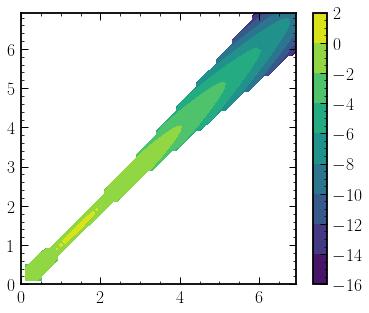

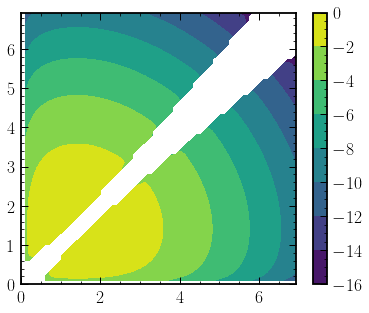

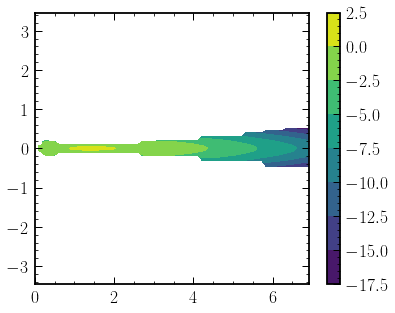

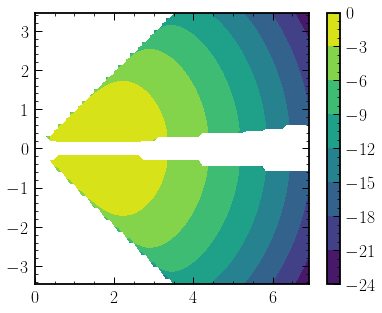

In [395]:
plt.figure()

plt.contourf(u_ary, u_ary, np.transpose(np.log10(u1u2_integ_dW[0])))

plt.colorbar()

plt.figure()

plt.contourf(u_ary, u_ary, np.transpose(np.log10(-u1u2_integ_dW[0])))

plt.colorbar()

plt.figure()

plt.contourf(sp_ary, sm_ary, np.transpose(np.log10(spsm_integ_dW[0])))

plt.colorbar()

plt.figure()

plt.contourf(sp_ary, sm_ary, np.transpose(np.log10(-spsm_integ_dW[0])))

plt.colorbar()

# plt.figure()

# plt.contourf(sp_ary, sm_ary, np.transpose(np.log10(spsm_res[1][0][:,:,0])))

# plt.colorbar()

# plt.figure()

# plt.contourf(sp_ary, sm_ary, np.transpose(np.log10(-spsm_res[1][0][:,:,0])))

# plt.colorbar()


/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2134734123.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(u1u2_int_y_dff[0,:,:,0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2134734123.py:3: RuntimeWarning: invalid value encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(u1u2_int_y_dff[0,:,:,0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2134734123.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(-u1u2_int_y_dff[0,:,:,0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2134734123.py:9: RuntimeWarning: invalid value encountered in log10
  plt.contourf(u_ary, u_ary, np.transpose(np.log10(-u1u2_int_y_dff[0,:,:,0])))
/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/2134734123.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(sp_ary,

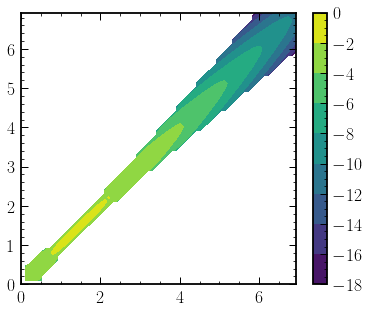

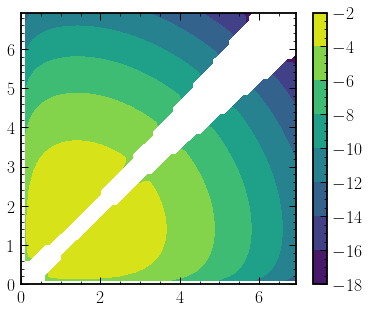

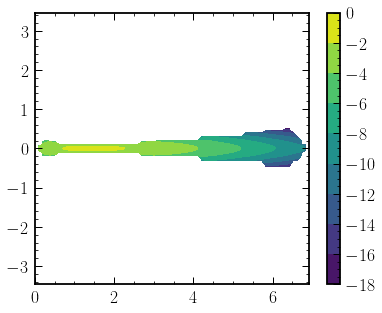

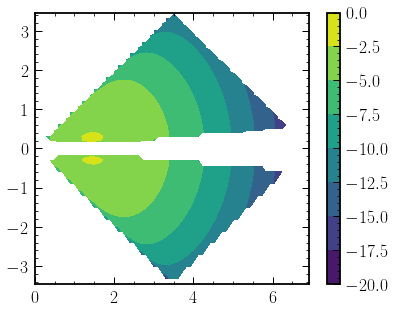

In [396]:
plt.figure()

plt.contourf(u_ary, u_ary, np.transpose(np.log10(u1u2_int_y_dff[0,:,:,0])))

plt.colorbar()

plt.figure()

plt.contourf(u_ary, u_ary, np.transpose(np.log10(-u1u2_int_y_dff[0,:,:,0])))

plt.colorbar()

plt.figure()

plt.contourf(sp_ary, sm_ary, np.transpose(np.log10(spsm_int_y_dff[0,:,:,0])))

plt.colorbar()

plt.figure()

plt.contourf(sp_ary, sm_ary, np.transpose(np.log10(-spsm_int_y_dff[0,:,:,0])))

plt.colorbar()

In [397]:
from scipy.interpolate import interp2d

# regular = interp2d(u_ary, u_ary, np.transpose(u1u2_integ_dW[0]))

# tilted = interp2d(sp_ary, sm_ary, np.transpose(spsm_integ_dW[0]))

regular = interp2d(u_ary, u_ary, np.transpose(u1u2_int_y_dff[0,:,:,0]), bounds_error=True)

tilted = interp2d(sp_ary, sm_ary, np.transpose(spsm_int_y_dff[0,:,:,0]))

In [398]:
u_ary

array([0.        , 0.10040874, 0.20081748, 0.30122623, 0.40163497,
       0.50204371, 0.60245245, 0.7028612 , 0.80326994, 0.90367868,
       1.00408742, 1.10449617, 1.20490491, 1.30531365, 1.40572239,
       1.50613114, 1.60653988, 1.70694862, 1.80735736, 1.90776611,
       2.00817485, 2.10858359, 2.20899233, 2.30940108, 2.40980982,
       2.51021856, 2.6106273 , 2.71103605, 2.81144479, 2.91185353,
       3.01226227, 3.11267102, 3.21307976, 3.3134885 , 3.41389724,
       3.51430599, 3.61471473, 3.71512347, 3.81553221, 3.91594096,
       4.0163497 , 4.11675844, 4.21716718, 4.31757593, 4.41798467,
       4.51839341, 4.61880215, 4.7192109 , 4.81961964, 4.92002838,
       5.02043712, 5.12084587, 5.22125461, 5.32166335, 5.42207209,
       5.52248084, 5.62288958, 5.72329832, 5.82370706, 5.92411581,
       6.02452455, 6.12493329, 6.22534203, 6.32575078, 6.42615952,
       6.52656826, 6.626977  , 6.72738575, 6.82779449, 6.92820323])

In [399]:
u1 = u_ary[1]
u2 = 0

print(regular(u1, u2))
print(tilted((u1 + u2)/2, (u1-u2)/2))

[0.]
[4.40897147e-05]


In [400]:
regular_2d = np.array([[regular(u1, u2) for u2 in u_ary] for u1 in u_ary])
tilted_2d  = np.array([[tilted((u1+u2) / 2, (u1-u2) / 2) for u2 in u_ary] for u1 in u_ary])

/var/folders/mj/4_fyrpls1pl78j1cnb_020y00000gn/T/ipykernel_2325/1267783247.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = regular_2d / tilted_2d


1.4029445346366253e-07
3.080261449116435e-05
[ 0.00000000e+00 -7.96215758e-06 -3.13674512e-05 -6.88422364e-05
 -1.18170971e-04 -1.76476256e-04 -2.40365861e-04 -3.06300933e-04
 -3.70995243e-04 -4.31074159e-04 -4.83555207e-04 -5.26308922e-04
 -5.57780568e-04 -5.77084944e-04 -5.84076624e-04 -5.79328036e-04
 -5.63810921e-04 -5.38805912e-04 -5.06256641e-04 -4.68138084e-04
 -4.26213550e-04 -3.82271435e-04 -3.37711900e-04 -2.93695533e-04
 -2.49126845e-04 -1.91971895e-04 -6.82507073e-05  2.90206295e-04
  1.14192812e-03  2.29080202e-03  2.67417986e-03  1.82258102e-03
  7.38180725e-04  1.78923835e-04  1.56628618e-05 -1.36054404e-05
 -1.42165128e-05 -1.09445547e-05 -7.96736900e-06 -5.69687299e-06
 -4.02471183e-06 -2.81102581e-06 -1.94074098e-06 -1.32510989e-06
 -8.94938522e-07 -5.97439120e-07 -3.94309928e-07 -2.57641086e-07
 -1.66538873e-07 -1.06428178e-07 -6.72838075e-08 -4.20915124e-08
 -2.60414399e-08 -1.59329672e-08 -9.64475123e-09 -5.77611540e-09
 -3.42105427e-09 -2.00447973e-09 -1.16237884e

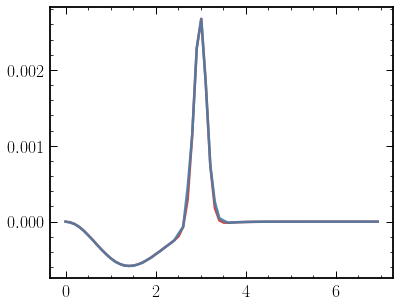

In [429]:
ratio = regular_2d / tilted_2d

plt.figure()

ind = 30



plt.plot(u_ary, regular_2d[ind].flatten())
plt.plot(u_ary, tilted_2d[ind].flatten())

print(np.trapz(np.squeeze(regular_2d[ind]), u_ary))
print(np.trapz(np.squeeze(tilted_2d[ind]), u_ary))

print(np.squeeze(regular_2d[ind]))
print(np.squeeze(tilted_2d[ind]))

In [418]:
print(np.trapz(np.squeeze(regular_2d), u_ary))
print(np.trapz(np.squeeze(tilted_2d), u_ary))

[ 0.00000000e+00 -1.11797244e-08 -9.19838923e-09  7.98667115e-08
  2.57159722e-07  3.73579847e-07  2.87574831e-07  1.37477360e-07
  2.07478753e-07  4.77101095e-07  6.76852281e-07  6.91850932e-07
  5.78810755e-07  4.03819001e-07  2.21796203e-07 -1.53520856e-10
 -4.17100939e-07 -9.93036827e-07 -1.32698490e-06 -1.10471055e-06
 -5.11446201e-07 -3.99443456e-08  1.93144350e-08 -1.65238392e-07
 -2.71375838e-07 -1.95346173e-07 -3.16130331e-08  1.05738256e-07
  1.73208373e-07  1.79784541e-07  1.40294453e-07  7.73862066e-08
  2.60494435e-08 -1.29883860e-09 -1.85009174e-08 -2.75753722e-08
 -1.93588964e-08 -1.10446817e-09  1.13755230e-08  1.40322646e-08
  1.13424773e-08  6.86562049e-09  2.54861791e-09 -4.19143713e-10
 -2.17373011e-09 -3.18690234e-09 -3.29287943e-09 -2.52196081e-09
 -1.51756768e-09 -7.79275965e-10 -3.42921478e-10 -1.05969170e-10
 -3.37011104e-12  2.16324605e-11  1.80227964e-11  8.90185182e-12
  1.07331553e-12 -2.89855188e-12 -3.24365598e-12 -2.02097043e-12
 -7.64675850e-13  2.48144

In [415]:
np.trapz(np.trapz(np.squeeze(tilted_2d), u_ary), u_ary)

0.0004271519681764687

In [385]:
sp_ary = np.array(u_ary)
sm_ary = np.concatenate((
    np.linspace(-u_ary[-1]/2, -0.3, 22),
    np.flipud(-np.logspace(-4, np.log10(0.3), 16)[:-1]),
    [0],
    np.logspace(-4, np.log10(0.3), 16)[:-1], 
    np.linspace(0.3, u_ary[-1]/2, 22)
))

In [388]:
test = np.union1d(sp_ary, sm_ary)
test = test[test < u_ary[-1]/2] 

In [390]:
test.shape

(108,)

In [654]:
def get_mesh(u_ary=u_ary): 

       mesh = []

       for i,u in enumerate(u_ary): 

              low_bound = 0
              upp_bound = u_ary[-1] 

              if i > 0: 

                     low_bound = u_ary[i-1] 

              if i < len(u_ary) - 1:

                     upp_bound = u_ary[i+1]

              bin_length = upp_bound - low_bound 
              
              if i > 0 and i < len(u_ary) - 1: 

                     bins = u + np.concatenate((
                            - np.flipud(np.logspace(-3, 0, 20)) * bin_length / 2,
                            [0],
                            np.logspace(-3, 0, 20) * bin_length / 2
                     ))

                     new_ary = np.concatenate((u_ary[:i], bins[1:-1], u_ary[i+1:]))


              elif i == 0: 

                     bins = u + np.concatenate((
                            [0],
                            np.logspace(-3, 0, 39) * bin_length
                     ))

                     new_ary = np.concatenate((bins[:-1], u_ary[1:]))

              elif i == len(u_ary) - 1: 

                     bins = u + np.concatenate((
                            - np.flipud(np.logspace(-3, 0, 39)) * bin_length,
                            [0]
                     ))

                     new_ary = np.concatenate((u_ary[:-1], bins[1:]))

              mesh.append(new_ary)

       # dimensions u1_ary x u2_ary after transposition. 
       return np.transpose(mesh)

In [658]:
ind = 69
print(u_ary[ind-1],u_ary[ind], get_mesh(u_ary)[:ind, ind], get_mesh(u_ary)[ind:ind+41,ind], get_mesh(u_ary)[ind+41:,ind])

6.82779448780775 6.9282032302755105 [0.         0.10040874 0.20081748 0.30122623 0.40163497 0.50204371
 0.60245245 0.7028612  0.80326994 0.90367868 1.00408742 1.10449617
 1.20490491 1.30531365 1.40572239 1.50613114 1.60653988 1.70694862
 1.80735736 1.90776611 2.00817485 2.10858359 2.20899233 2.30940108
 2.40980982 2.51021856 2.6106273  2.71103605 2.81144479 2.91185353
 3.01226227 3.11267102 3.21307976 3.3134885  3.41389724 3.51430599
 3.61471473 3.71512347 3.81553221 3.91594096 4.0163497  4.11675844
 4.21716718 4.31757593 4.41798467 4.51839341 4.61880215 4.7192109
 4.81961964 4.92002838 5.02043712 5.12084587 5.22125461 5.32166335
 5.42207209 5.52248084 5.62288958 5.72329832 5.82370706 5.92411581
 6.02452455 6.12493329 6.22534203 6.32575078 6.42615952 6.52656826
 6.626977   6.72738575 6.82779449] [6.84448421 6.8583998  6.87000237 6.87967639 6.88774241 6.89446772
 6.90007516 6.90475054 6.9086488  6.91189909 6.91460913 6.91686871
 6.91875271 6.92032355 6.9216333  6.92272534 6.92363586 6.9

In [513]:
u_ary

array([0.        , 0.10040874, 0.20081748, 0.30122623, 0.40163497,
       0.50204371, 0.60245245, 0.7028612 , 0.80326994, 0.90367868,
       1.00408742, 1.10449617, 1.20490491, 1.30531365, 1.40572239,
       1.50613114, 1.60653988, 1.70694862, 1.80735736, 1.90776611,
       2.00817485, 2.10858359, 2.20899233, 2.30940108, 2.40980982,
       2.51021856, 2.6106273 , 2.71103605, 2.81144479, 2.91185353,
       3.01226227, 3.11267102, 3.21307976, 3.3134885 , 3.41389724,
       3.51430599, 3.61471473, 3.71512347, 3.81553221, 3.91594096,
       4.0163497 , 4.11675844, 4.21716718, 4.31757593, 4.41798467,
       4.51839341, 4.61880215, 4.7192109 , 4.81961964, 4.92002838,
       5.02043712, 5.12084587, 5.22125461, 5.32166335, 5.42207209,
       5.52248084, 5.62288958, 5.72329832, 5.82370706, 5.92411581,
       6.02452455, 6.12493329, 6.22534203, 6.32575078, 6.42615952,
       6.52656826, 6.626977  , 6.72738575, 6.82779449, 6.92820323])

In [505]:
a = np.array([1, 2, 3, 5, 6, 7, 3 ,4])
a[5:8]

array([7, 3, 4])

In [708]:
corrs=np.loadtxt(open('../correlations.dat'), delimiter="\t")


In [713]:
T21_fluc.v_fluc.cperpint(1e-5)

array(0.99999993)

In [37]:
test = np.indices((2,3,4)).transpose((1,2,3,0))

In [44]:
test[tuple(test[1,2,2])]

array([1, 2, 2])